In [1]:
import pandas as pd

# Read the Excel file
rawdatadf = pd.read_excel('ZEN_sensor_data.xlsx', sheet_name='RAW DATA')
# Display the columns of the dataframe
print(rawdatadf.columns)
# Display the shape of the dataframe
print(rawdatadf.shape)
# Display the first few rows of the dataframe
rawdatadf.head()

Index(['binned_time', 'deviceId', 'co2', 'pressure', 'temperature'], dtype='object')
(334, 5)


,binned_time,deviceId,co2,pressure,temperature
0,2025-06-10 10:44:00,esp32-001,0,-48.28,30.100000
1,2025-06-10 10:45:00,esp32-001,0,-48.28,30.958333
2,2025-06-10 10:46:00,esp32-001,0,-48.28,31.250000
3,2025-06-10 10:47:00,esp32-001,0,-48.28,32.000000
4,2025-06-10 10:48:00,esp32-001,0,-48.28,31.708333


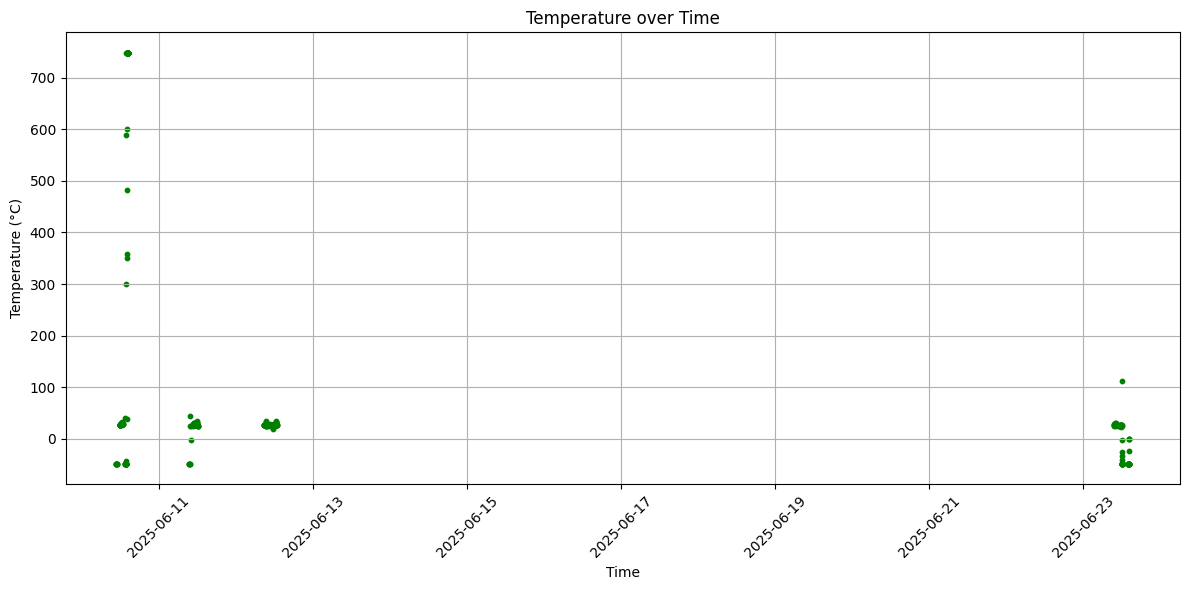

In [2]:
import matplotlib.pyplot as plt

# Scatter plot: binned_time vs temperature
plt.figure(figsize=(12, 6))
plt.scatter(rawdatadf['binned_time'], rawdatadf['pressure'], c='green', s=10)
plt.title('Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    rawdatadf,
    x='binned_time',
    y='pressure',
    title='pressure Data Over Time',
    labels={'binned_time': 'Time', 'pressure': 'pressure (Pa)'},
    template='plotly_white'
)

# Update layout to enable rangeslider and zooming
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5m", step="minute", stepmode="backward"),
                dict(count=15, label="15m", step="minute", stepmode="backward"),
                dict(count=1, label="1h", step="hour", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show the interactive plot
fig.show()


In [9]:
import plotly.graph_objects as go

# Initialize figure with scatter plot trace (default)
fig = go.Figure()

# Add Scatter trace (mode = 'markers')
fig.add_trace(go.Scatter(
    x=rawdatadf['binned_time'],
    y=rawdatadf['pressure'],
    mode='markers',
    name='Scatter'
))

# Add Line trace (mode = 'lines')
fig.add_trace(go.Scatter(
    x=rawdatadf['binned_time'],
    y=rawdatadf['pressure'],
    mode='lines',
    name='Line',
    visible=False
))

# Add Bar trace
fig.add_trace(go.Bar(
    x=rawdatadf['binned_time'],
    y=rawdatadf['pressure'],
    name='Bar',
    visible=False
))

# Set up the layout with rangeslider and range selectors
fig.update_layout(
    title='pressure Data Over Time',
    xaxis=dict(
        title='Time',
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5m", step="minute", stepmode="backward"),
                dict(count=15, label="15m", step="minute", stepmode="backward"),
                dict(count=1, label="1h", step="hour", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    yaxis=dict(
        title='pressure (Pa)',
        range=[20, 35],
        fixedrange=False
    ),
    template='plotly_white',
    
    # Add updatemenus for chart type toggle
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.5,
            y=1.15,
            showactive=True,
            buttons=list([
                dict(
                    label="Scatter",
                    method="update",
                    args=[{"visible": [True, False, False]},
                          {"title": "pressure Data Over Time (Scatter Plot)"}]
                ),
                dict(
                    label="Line",
                    method="update",
                    args=[{"visible": [False, True, False]},
                          {"title": "pressure Data Over Time (Line Plot)"}]
                ),
                dict(
                    label="Bar",
                    method="update",
                    args=[{"visible": [False, False, True]},
                          {"title": "pressure Data Over Time (Bar Plot)"}]
                )
            ])
        )
    ]
)

# Show the interactive plot
fig.show()
